<a href="https://colab.research.google.com/github/ranggasatria59/Analisis-Risiko-Kredit-untuk-Perusahaan-Pembiayaan/blob/main/Analisis_Kesehatan_Finansial_Perusahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Mengimpor data dari file CSV
data = pd.read_csv('/content/data_perusahaan_random (1).csv')

In [ ]:
data.head()

,ID,Usia_Perusahaan,Pendapatan,BebanOperasional,AsetLancar,UtangJangkaPendek,Ekuitas,LabaBersih,Status_Keuangan
0,1,3,949084,1218506,815651,623193,715109,53070,Sehat
1,2,1,741612,1419939,325470,225913,1152303,223202,Sehat
2,3,4,1227381,1708417,883658,403593,963990,143163,Sehat
3,4,7,543592,1087824,402982,270375,633003,141249,Sehat
4,5,6,1108726,1607577,1124191,612648,1197240,93358,Sehat


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 100 non-null    int64 
 1   Usia_Perusahaan    100 non-null    int64 
 2   Pendapatan         100 non-null    int64 
 3   BebanOperasional   100 non-null    int64 
 4   AsetLancar         100 non-null    int64 
 5   UtangJangkaPendek  100 non-null    int64 
 6   Ekuitas            100 non-null    int64 
 7   LabaBersih         100 non-null    int64 
 8   Status_Keuangan    100 non-null    object
dtypes: int64(8), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,ID,Usia_Perusahaan,Pendapatan,BebanOperasional,AsetLancar,UtangJangkaPendek,Ekuitas,LabaBersih
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,50.500000,5.050000,1.288726e+06,1.051700e+06,9.332928e+05,427040.700000,8.773952e+05,148144.050000
std,29.011492,2.599048,4.287846e+05,4.109529e+05,3.343828e+05,174681.231539,1.699970e+05,63947.441551
min,1.000000,1.000000,5.000510e+05,4.031530e+05,3.050600e+05,153297.000000,6.043250e+05,0.000000
25%,25.750000,3.000000,9.257268e+05,6.739992e+05,6.792455e+05,286102.000000,7.453258e+05,103412.750000
50%,50.500000,5.500000,1.250240e+06,1.033992e+06,9.667875e+05,412249.000000,8.676960e+05,156834.000000
75%,75.250000,7.000000,1.692388e+06,1.379287e+06,1.212950e+06,562995.250000,9.955355e+05,194622.250000
max,100.000000,9.000000,1.992556e+06,1.799455e+06,1.479035e+06,745169.000000,1.197240e+06,248400.000000


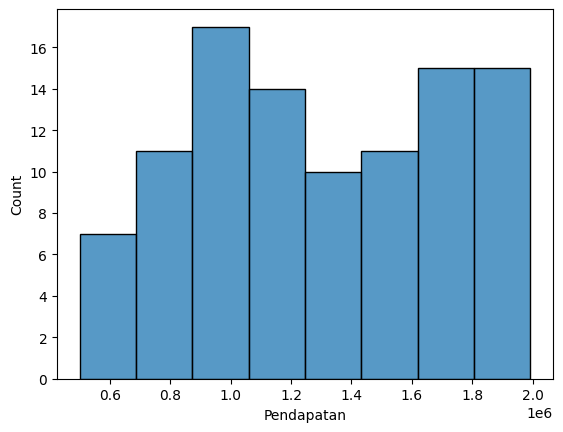

In [ ]:
sns.histplot(data['Pendapatan'])
plt.show()

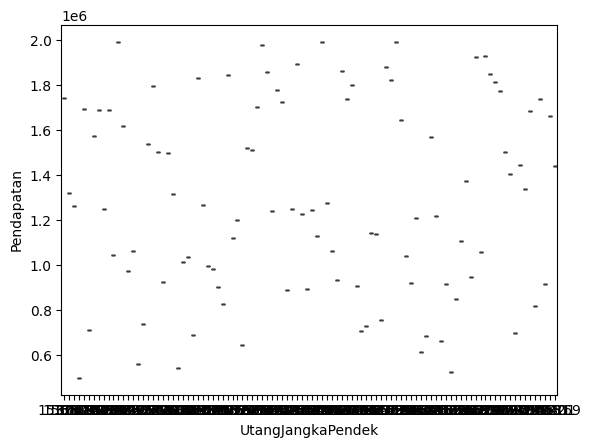

In [ ]:
sns.boxplot(x='UtangJangkaPendek', y='Pendapatan', data=data)
plt.show()

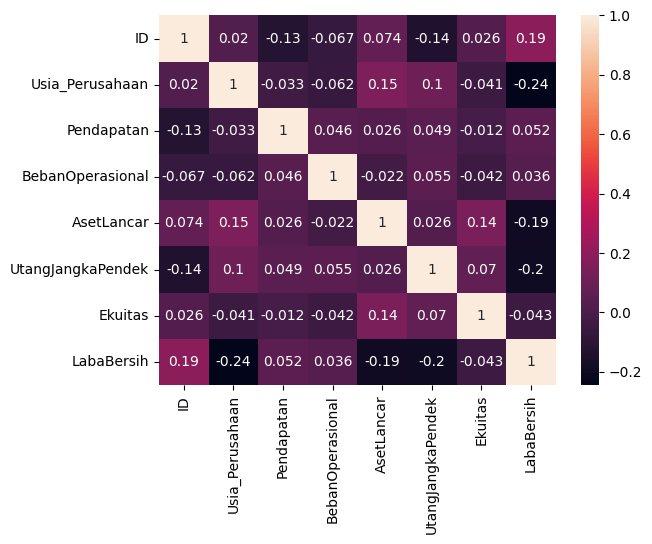

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_data = data.select_dtypes(include=['number'])
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Contoh perhitungan rasio current ratio
data['Current_Ratio'] = data['AsetLancar'] / data['UtangJangkaPendek']

In [ ]:
import pandas as pd

# Mengunggah file CSV (pastikan file CSV sudah diunggah ke Google Drive)
from google.colab import files
uploaded = files.upload()

# Membaca file CSV (sesuaikan nama file)
data = pd.read_csv('/content/data_perusahaan_random (1).csv', sep=',')  # Ganti 'data_perusahaan.csv' dengan nama file Anda

# Menambahkan kolom 'Status_Keuangan' (contoh: berdasarkan laba bersih)
def classify_financial_status(row):
  if row['LabaBersih'] > 0:
    return 'Sehat'
  else:
    return 'Kurang Sehat'  # Now assigning a different class for negative or zero laba bersih

data['Status_Keuangan'] = data.apply(classify_financial_status, axis=1)

# Menampilkan data yang sudah diperbarui
print(data.head())

# Menyimpan data ke file CSV baru
data.to_csv('data_perusahaan_random(1).csv', index=False)

Saving data_perusahaan_random (1).csv to data_perusahaan_random (1) (2).csv
   ID  Usia_Perusahaan  Pendapatan  BebanOperasional  AsetLancar  \
0   1                3      949084           1218506      815651   
1   2                1      741612           1419939      325470   
2   3                4     1227381           1708417      883658   
3   4                7      543592           1087824      402982   
4   5                6     1108726           1607577     1124191   

   UtangJangkaPendek  Ekuitas  LabaBersih Status_Keuangan  
0             623193   715109       53070           Sehat  
1             225913  1152303      223202           Sehat  
2             403593   963990      143163           Sehat  
3             270375   633003      141249           Sehat  
4             612648  1197240       93358           Sehat  


In [ ]:
# Memisahkan fitur dan target
X = data.drop('Status_Keuangan', axis=1)
y = data['Status_Keuangan']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Sehat       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Interpretasi Hasil
Analisis Deskriptif: Jelaskan apa yang ditunjukkan oleh statistik deskriptif.
Visualisasi: Jelaskan apa yang ditunjukkan oleh grafik-grafik.
Rasio Keuangan: Interpretasikan nilai rasio keuangan dan bandingkan dengan standar industri atau perusahaan sejenis.
Model Prediktif: Evaluasi kinerja model prediksi dan identifikasi fitur-fitur yang paling berpengaruh.
Catatan:

Data Berkualitas: Pastikan data yang Anda gunakan akurat, lengkap, dan relevan.
Pilihan Model: Model prediksi yang tepat tergantung pada jenis data dan tujuan analisis.
Interpretasi: Interpretasi hasil harus dilakukan dengan hati-hati dan mempertimbangkan konteks bisnis.
Pengembangan Lebih Lanjut:

Analisis Sensitivitas: Uji bagaimana perubahan pada asumsi atau data mempengaruhi hasil analisis.
Perbandingan dengan Perusahaan Lain: Bandingkan kinerja keuangan perusahaan dengan perusahaan sejenis.
Analisis Tren: Analisis perubahan kinerja keuangan dari waktu ke waktu.
Dengan mengikuti langkah-langkah di atas dan menyesuaikannya dengan data dan kebutuhan spesifik Anda, Anda dapat melakukan analisis kesehatan finansial perusahaan secara komprehensif menggunakan Google Colab.

Apakah Anda ingin saya bantu dengan bagian tertentu dari analisis ini? Misalnya, saya dapat membantu Anda dengan:

Memilih rasio keuangan yang tepat
Membangun model prediksi yang lebih kompleks
Visualisasi data yang lebih interaktif